<a href="https://colab.research.google.com/github/yasnitanoto/exercise/blob/main/Image_Classification_Dicoding_Course_Yasnita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identitas**
#### Nama: Yasnita
#### FGA Machine Learning IBM 2021


## **Import Packages**

In [ ]:
import tensorflow as tf
import os
import zipfile

## **Import Dataset**

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip
  # kaggle datasets download -d alxmamaev/flowers-recognition

--2021-07-18 08:33:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.70MB/s    in 68s     

2021-07-18 08:35:08 (4.53 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

!kaggle datasets download -d alxmamaev/flowers-recognition

In [ ]:
!mkdir weather-dataset
!unzip weather-dataset-rattle-package.zip -d weather-dataset
!ls weather-dataset

In [ ]:
localzip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(localzip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/rockpaperscissors'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

if not os.path.exists(train_dir): os.mkdir(train_dir)
if not os.path.exists(val_dir): os.mkdir(val_dir)

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['train',
 'val',
 'scissors',
 'rps-cv-images',
 'rock',
 'paper',
 'README_rpc-cv-images.txt']

In [ ]:
paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
lenpaper = len(os.listdir(paper_dir))
lenrock = len(os.listdir(rock_dir))
lenscissor = len(os.listdir(scissors_dir))
print('size paper:', lenpaper)
print('size rock:', lenrock)
print('size scissors:', lenscissor)

size paper: 712
size rock: 726
size scissors: 750


In [ ]:
# Membuat directory train untuk paper, rock, scissor
train_paper = os.path.join(train_dir, 'paper')
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')

if not os.path.exists(train_paper): os.mkdir(train_paper)
if not os.path.exists(train_rock): os.mkdir(train_rock)
if not os.path.exists(train_scissors): os.mkdir(train_scissors)

In [ ]:
# Membuat directory validation untuk paper, rock, scissor
val_paper = os.path.join(val_dir, 'paper')
val_rock = os.path.join(val_dir, 'rock')
val_scissors = os.path.join(val_dir, 'scissors')

if not os.path.exists(val_paper): os.mkdir(val_paper)
if not os.path.exists(val_rock): os.mkdir(val_rock)
if not os.path.exists(val_scissors): os.mkdir(val_scissors)

## **Split Data ke Train dan Validation**

In [ ]:
# Split data menggunakan library sklearn
from sklearn.model_selection import train_test_split as tts
train_paper_dir, val_paper_dir = tts(os.listdir(paper_dir), test_size=0.40)
train_rock_dir, val_rock_dir = tts(os.listdir(rock_dir), test_size=0.40)
train_scissors_dir, val_scissors_dir = tts(os.listdir(scissors_dir), test_size=0.40)

In [ ]:
# Menyalin gambar ke directory baru (paper, rock, scissor disalin ke train dan val)
import shutil

for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), 
                os.path.join(train_paper, i))
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), 
                os.path.join(train_rock, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), 
                os.path.join(train_scissors, i))

for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), 
                os.path.join(val_paper, i))
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), 
                os.path.join(val_rock, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), 
                os.path.join(val_scissors, i))

In [ ]:
# Augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=20,
        class_mode='categorical') 
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=20, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# Membuat model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Konfigurasi model
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Membuat kelas mengakhiri epoch yang akurasinya di atas 96%
acc_threshold = 0.96
class stopepoch(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc'and'val_acc') > acc_threshold):   
          print("\nReached > %2.2f%% accuracy" %(acc_threshold*100))   
          self.model.stop_training = True

#Instantiate callback
callbacks = stopepoch()

In [ ]:
# Fit model
history = model.fit(
    train_generator,
    steps_per_epoch = 30,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose = 2,
    callbacks=[callbacks]
)

Epoch 1/20
30/30 - 37s - loss: 1.1012 - acc: 0.3919 - val_loss: 1.0348 - val_acc: 0.4100
Epoch 2/20
30/30 - 5s - loss: 0.8739 - acc: 0.5828 - val_loss: 0.8182 - val_acc: 0.6100
Epoch 3/20
30/30 - 5s - loss: 0.6357 - acc: 0.7683 - val_loss: 0.3961 - val_acc: 0.8800
Epoch 4/20
30/30 - 5s - loss: 0.3673 - acc: 0.8783 - val_loss: 0.2793 - val_acc: 0.9300
Epoch 5/20
30/30 - 5s - loss: 0.2234 - acc: 0.9317 - val_loss: 0.3406 - val_acc: 0.8750
Epoch 6/20
30/30 - 5s - loss: 0.2005 - acc: 0.9317 - val_loss: 0.2930 - val_acc: 0.8900
Epoch 7/20
30/30 - 5s - loss: 0.1651 - acc: 0.9433 - val_loss: 0.1622 - val_acc: 0.9450
Epoch 8/20
30/30 - 5s - loss: 0.1728 - acc: 0.9517 - val_loss: 0.1091 - val_acc: 0.9750

Reached > 96.00% accuracy


In [ ]:
# Membuat fungsi Plot untuk visualisasi akurasi dan loss
import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and Validation '+ metric)
    plt.xlabel("epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

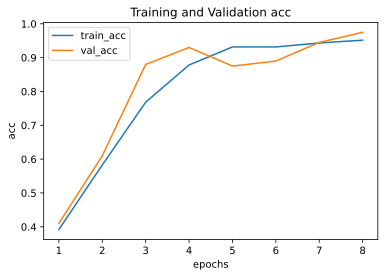

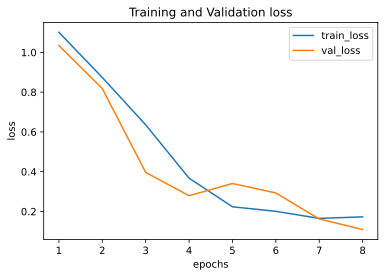

In [ ]:
# Memanggil fungsi plot
plot_metric(history, 'acc')
plot_metric(history, 'loss')

## **Upload dan Prediksi Image**

Saving 0ePX1wuCc3et7leL.png to 0ePX1wuCc3et7leL.png
0ePX1wuCc3et7leL.png
Scissor detected!


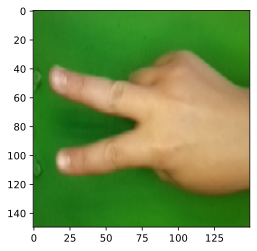

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
    path=fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x= image.img_to_array(img)
    x= np.expand_dims(x, axis=0)
    
    images= np.vstack([x])
    classes=model.predict(images, batch_size=10)
    
    print(fn)
    if classes[0,0]!=0:
        print('Paper detected!')
    elif classes[0,1]!=0:
        print('Rock detected!')
    else:
        print('Scissor detected!')

## **Export Tflite**

In [ ]:
# warnings.filterwarnings('ignore')
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#savemodel
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpongkzot4/assets
